In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from scipy.stats import ttest_ind,pearsonr,chi2_contingency,f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
print('Number of rows in the dataset',df.shape[0])
print('Number of columns in the dataset',df.shape[1])

Number of rows in the dataset 986
Number of columns in the dataset 11


## Basic Information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


### Observations:
    1. All of the columns are of type integer.
    2. By looking at the dataset we can see that although all columns are type integer, only age, height, weight and              PremiumPrice are actually integers, rest of them are categorical so we need to convert them into object.
    

In [6]:

for i in df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']] : 
     df[i]=df[i].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


#### Now all of the datatypes are correct.

### Null values

In [8]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

### Observation: 
There are no NULL values in the dataset

### Checking for Duplicate values

In [9]:
dups=df.duplicated()
print('Number of duplicate records',dups.sum())

Number of duplicate records 0


## Exploratory Data Analysis

In [10]:
# Seprating the object and numeric variable
cat = []
num = []
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

### Describing numerical columns

In [11]:
df[num].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


### Observations:
    1. Minimum Age of users is 18 years and Maximum Age is 66  years where Average Age is around 42 years.
    2. Minimum Height of the User 145 and Maximum  Height is 188 and Average Height is 168.
    3. Minimum Weight  of the User 51 and Maximum  Weight is 132 and Average Weight is 77.
    4. Minimum Premium Price  that User Pays is 15000 and Maximum Premium Price is 40000 while the Average Premium price is 24337.We observe that the Standard deviation is very large for Premium Price.

### Describing categorical columns

In [12]:
df[cat].describe().T

,count,unique,top,freq
Diabetes,986,2,0,572
BloodPressureProblems,986,2,0,524
AnyTransplants,986,2,0,931
AnyChronicDiseases,986,2,0,808
KnownAllergies,986,2,0,774
HistoryOfCancerInFamily,986,2,0,870
NumberOfMajorSurgeries,986,4,0,479


### Observations:
    1.Except NumberOfMajorSurgeries, all of the categorical columns are of boolean type(yes or no).
    2.All of the categorical has 0 as the most probable category.
    3.Here we can see that there are lesser no of 0s in blood pressure, diabetes and NumberOfMajorSurgeries	that means these are probably the major health concerns in the users given in this dataset.

### Checking unique values

In [13]:
for i in df[cat]:
    print(f"Distinct Values in {i} : {df[i].nunique()}")
    print(df[i].value_counts())
    print('\n\n')

Distinct Values in Diabetes : 2
Diabetes
0    572
1    414
Name: count, dtype: int64



Distinct Values in BloodPressureProblems : 2
BloodPressureProblems
0    524
1    462
Name: count, dtype: int64



Distinct Values in AnyTransplants : 2
AnyTransplants
0    931
1     55
Name: count, dtype: int64



Distinct Values in AnyChronicDiseases : 2
AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64



Distinct Values in KnownAllergies : 2
KnownAllergies
0    774
1    212
Name: count, dtype: int64



Distinct Values in HistoryOfCancerInFamily : 2
HistoryOfCancerInFamily
0    870
1    116
Name: count, dtype: int64



Distinct Values in NumberOfMajorSurgeries : 4
NumberOfMajorSurgeries
0    479
1    372
2    119
3     16
Name: count, dtype: int64





### Checking for Outliers

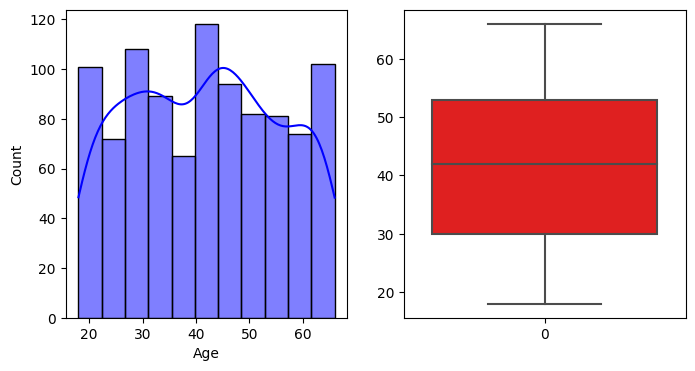

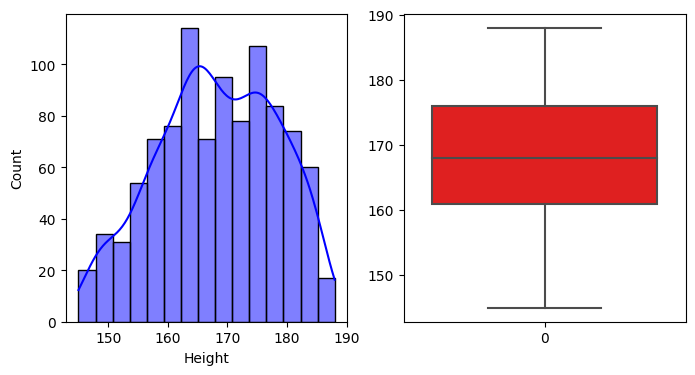

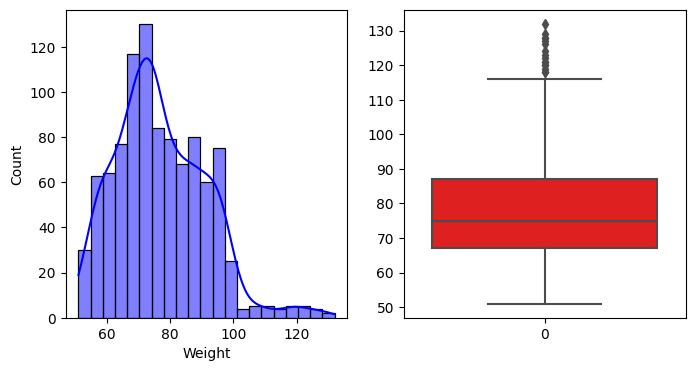

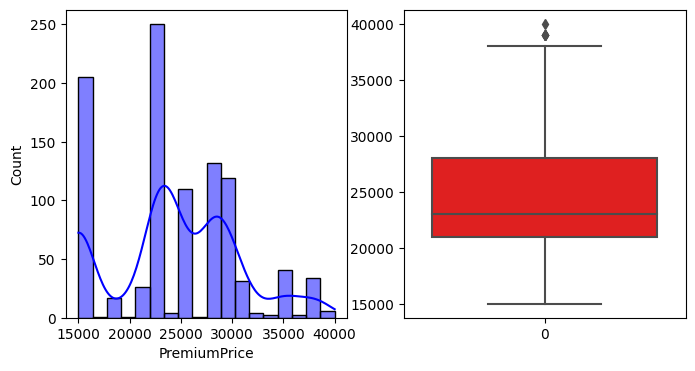

In [14]:
for i in df[num]:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(df[i],kde=True,ax=axes[0],color='blue')
    sns.boxplot(df[i],ax=axes[1],color='red')

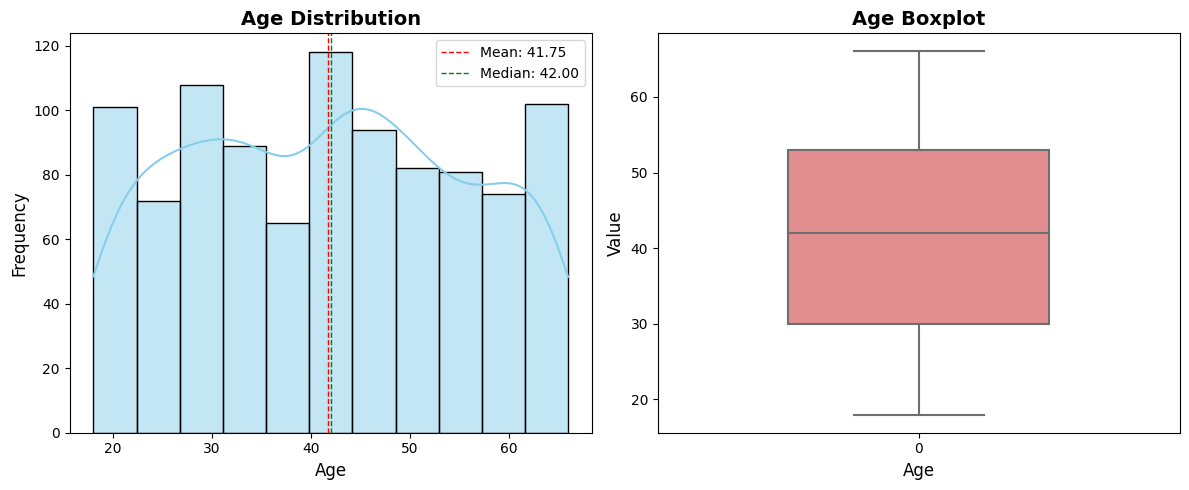

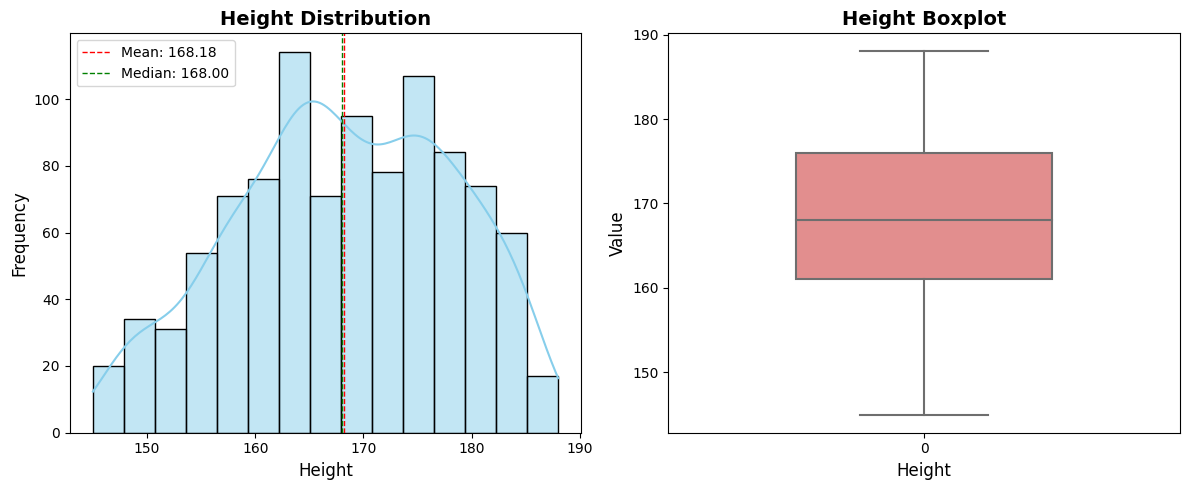

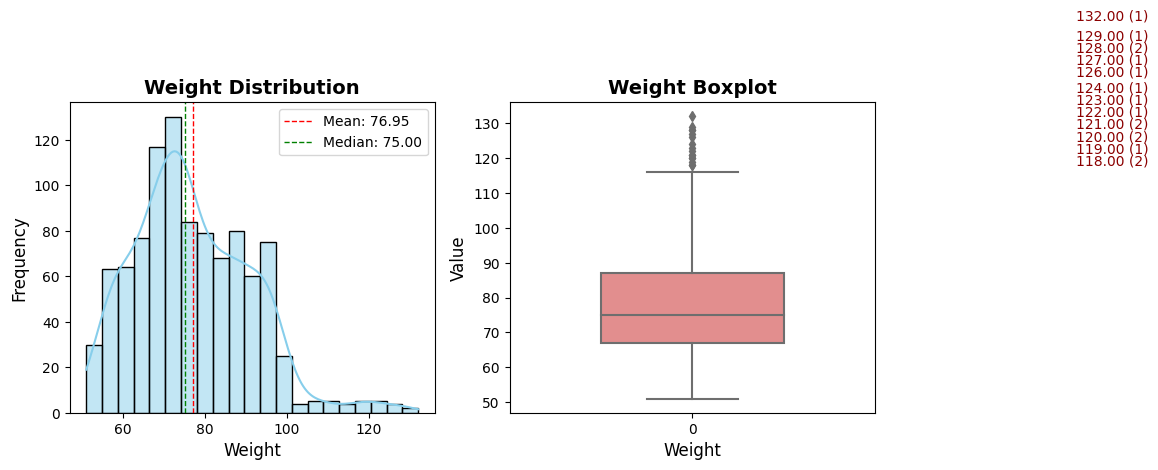

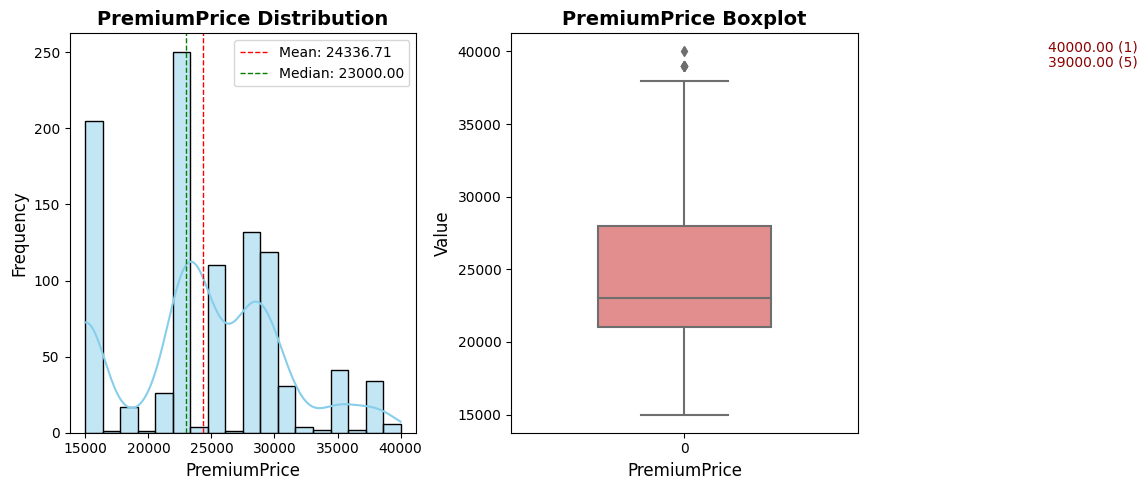

In [15]:
for i in df[num]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    # Histogram with KDE
    sns.histplot(df[i], kde=True, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'{i} Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel(i, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    mean = df[i].mean()
    median = df[i].median()
    axes[0].axvline(mean, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
    axes[0].axvline(median, color='green', linestyle='--', linewidth=1, label=f'Median: {median:.2f}')
    axes[0].legend(fontsize=10)
    
    # Boxplot
    sns.boxplot(df[i], ax=axes[1], color='lightcoral', width=0.5)
    axes[1].set_title(f'{i} Boxplot', fontsize=14, fontweight='bold')
    axes[1].set_xlabel(i, fontsize=12)
    axes[1].set_ylabel('Value', fontsize=12)
    
    # Annotate outliers
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)][i]
    if not outliers.empty:
        unique_outliers = outliers.value_counts().sort_index()
        for idx, (value, count) in enumerate(unique_outliers.items()):
            offset = idx * 2.5  # Adjust the offset for each unique value
            axes[1].text(1.05, value + offset, f'{value:.2f} ({count})', 
                         fontsize=10, color='darkred', ha='left')

    # Layout adjustments
    plt.tight_layout()
    plt.show()


### Observation:
There are multiple outliers in Premium Price and Weight.

### Univariate Analysis

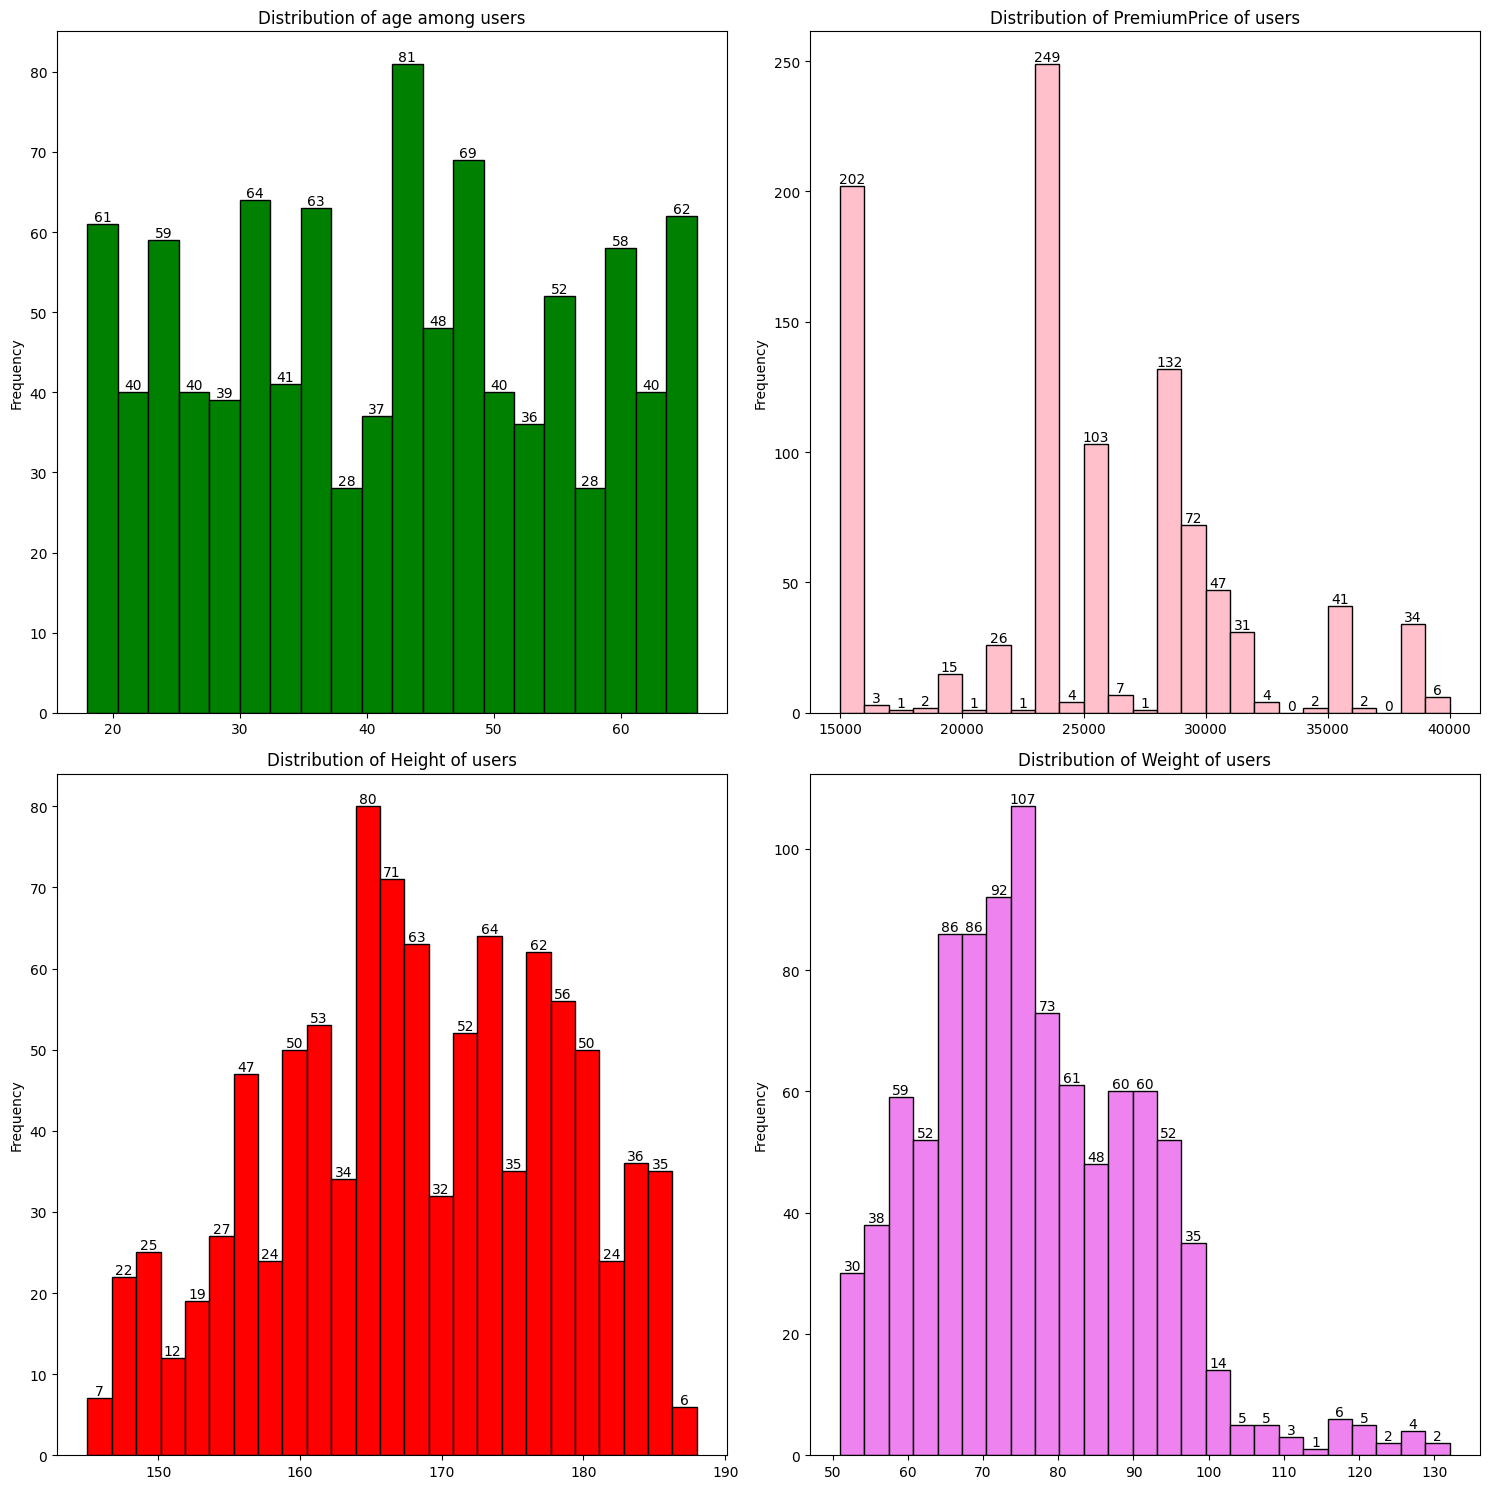

In [16]:
f, ax = plt.subplots(2, 2, figsize=(15, 15))

# Plot histogram for Age
age_hist = df.Age.plot.hist(bins=20, edgecolor='black', color='green', ax=ax[0][0])
ax[0][0].set_title('Distribution of age among users')
for patch in age_hist.patches:
    ax[0][0].annotate(f'{int(patch.get_height())}', 
                      (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                      ha='center', va='bottom')

# Plot histogram for PremiumPrice
premium_hist = df.PremiumPrice.plot.hist(bins=25, edgecolor='black', color='pink', ax=ax[0][1])
ax[0][1].set_title('Distribution of PremiumPrice of users')
for patch in premium_hist.patches:
    ax[0][1].annotate(f'{int(patch.get_height())}', 
                      (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                      ha='center', va='bottom')

# Plot histogram for Height
height_hist = df.Height.plot.hist(bins=25, edgecolor='black', color='red', ax=ax[1][0])
ax[1][0].set_title('Distribution of Height of users')
for patch in height_hist.patches:
    ax[1][0].annotate(f'{int(patch.get_height())}', 
                      (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                      ha='center', va='bottom')

# Plot histogram for Weight
weight_hist = df.Weight.plot.hist(bins=25, edgecolor='black', color='violet', ax=ax[1][1])
ax[1][1].set_title('Distribution of Weight of users')
for patch in weight_hist.patches:
    ax[1][1].annotate(f'{int(patch.get_height())}', 
                      (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()


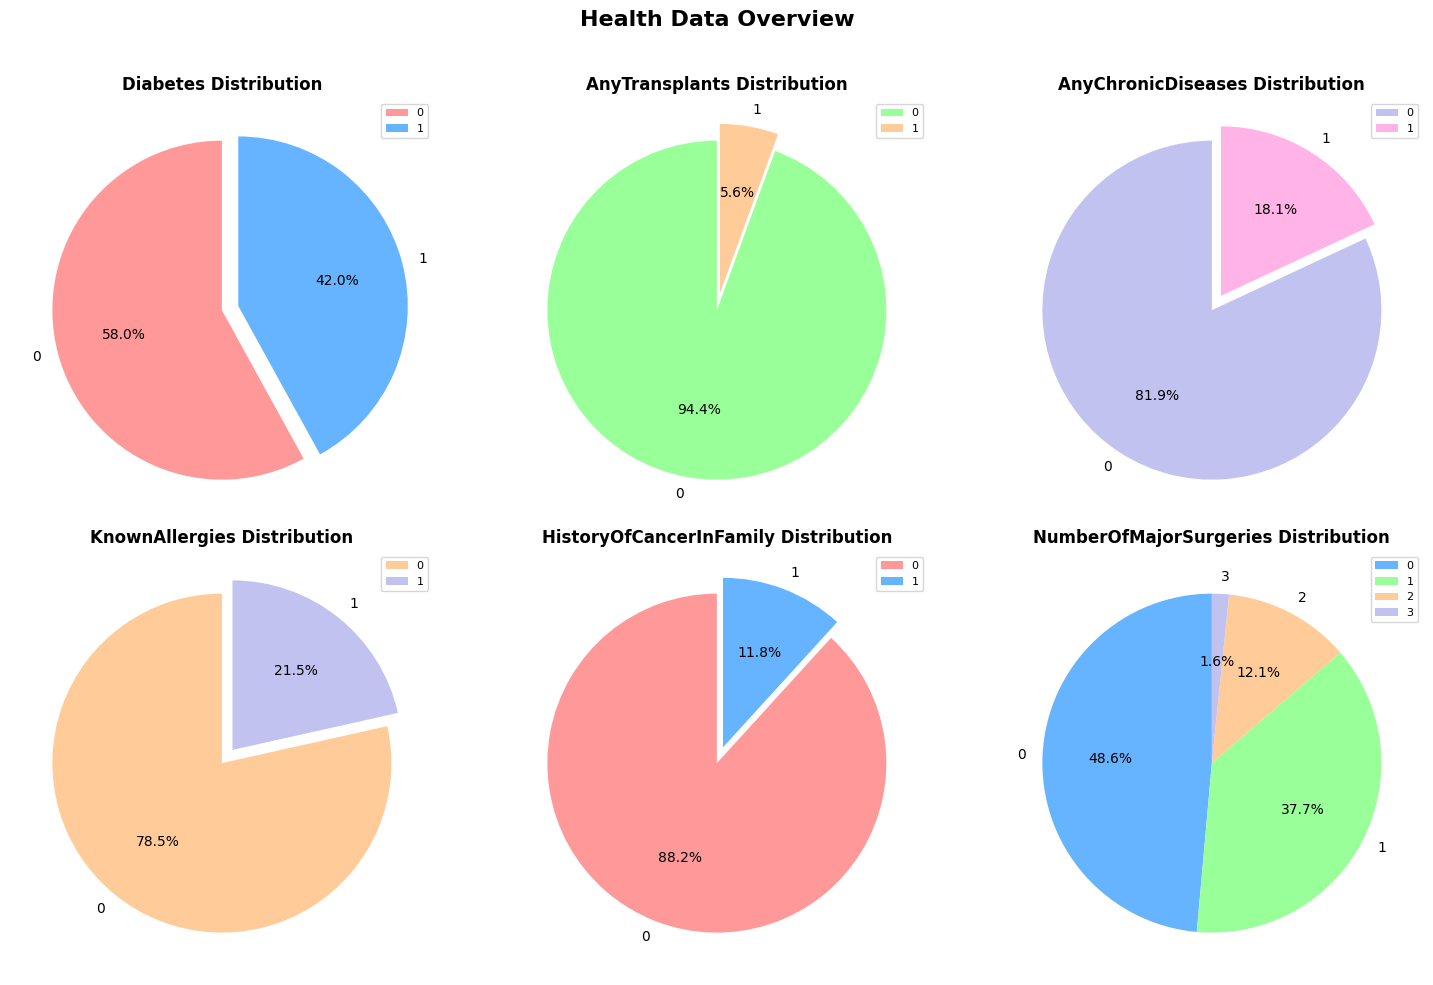

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Health Data Overview", fontsize=16, fontweight='bold')

# Define pie chart parameters for better visualization
pie_params = [
    ('Diabetes', [0, 0.1]),
    ('AnyTransplants', [0, 0.1]),
    ('AnyChronicDiseases', [0, 0.1]),
    ('KnownAllergies', [0, 0.1]),
    ('HistoryOfCancerInFamily', [0, 0.1]),
    ('NumberOfMajorSurgeries', [0, 0, 0, 0])
]

# Colors for the charts
colors_list = [
    ['#ff9999', '#66b3ff'],  # For binary distributions
    ['#99ff99', '#ffcc99'],  # Alternate binary colors
    ['#c2c2f0', '#ffb3e6'],  # Alternate binary colors
    ['#ffcc99', '#c2c2f0'],  # Alternate binary colors
    ['#ff9999', '#66b3ff'],  # Alternate binary colors
    ['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Multiclass
]

# Create pie charts with additional context
for i, (column, explode) in enumerate(pie_params):
    row, col = divmod(i, 3)
    df[column].value_counts().plot.pie(
        explode=explode,
        autopct='%1.1f%%',
        ax=ax[row][col],
        colors=colors_list[i],
        startangle=90,
        textprops={'fontsize': 10}
    )
    ax[row][col].set_title(f'{column} Distribution', fontsize=12, fontweight='bold')
    ax[row][col].set_ylabel("")  # Remove default y-label
    ax[row][col].legend(
        labels=df[column].value_counts().index.tolist(), 
        loc="upper right", 
        fontsize=8
    )

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()


### Multivariate Analysis

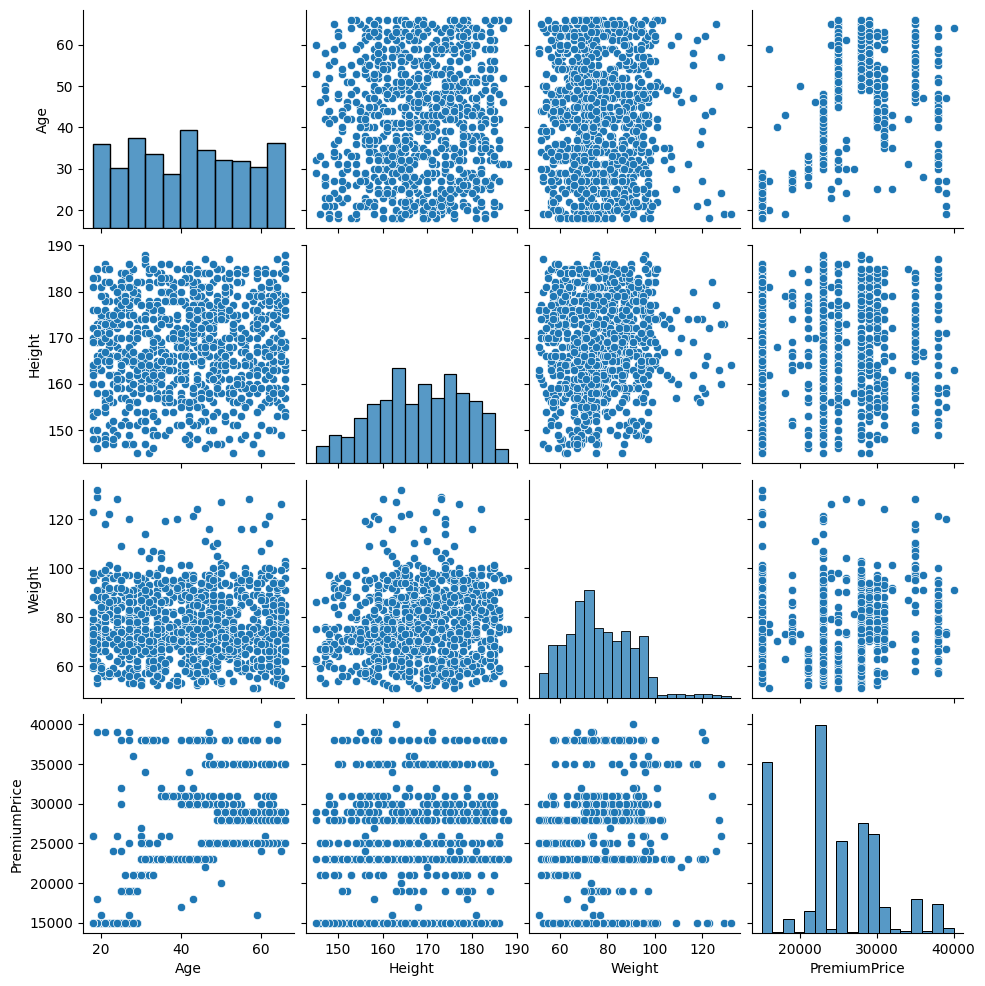

In [18]:
sns.pairplot(df[num])
plt.show()


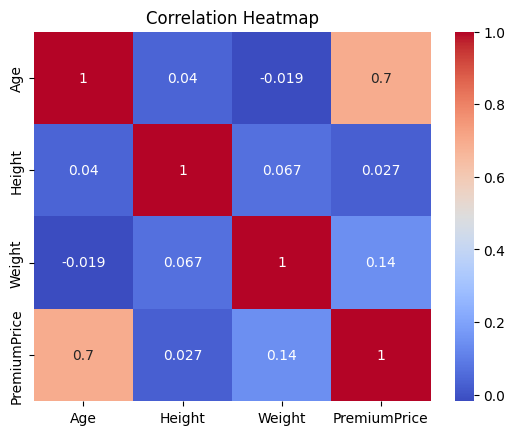

In [19]:
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We Observe that there is strong correlation Between Age and Premium Price.  

### Relation between Age and Premium Price.

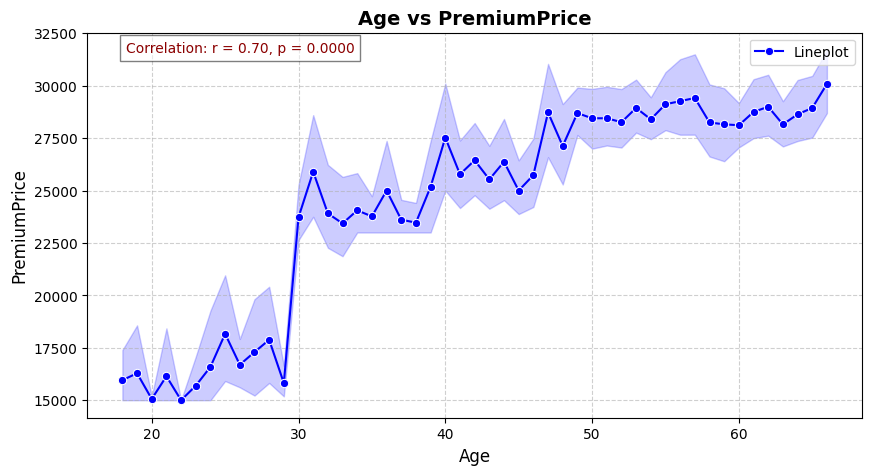

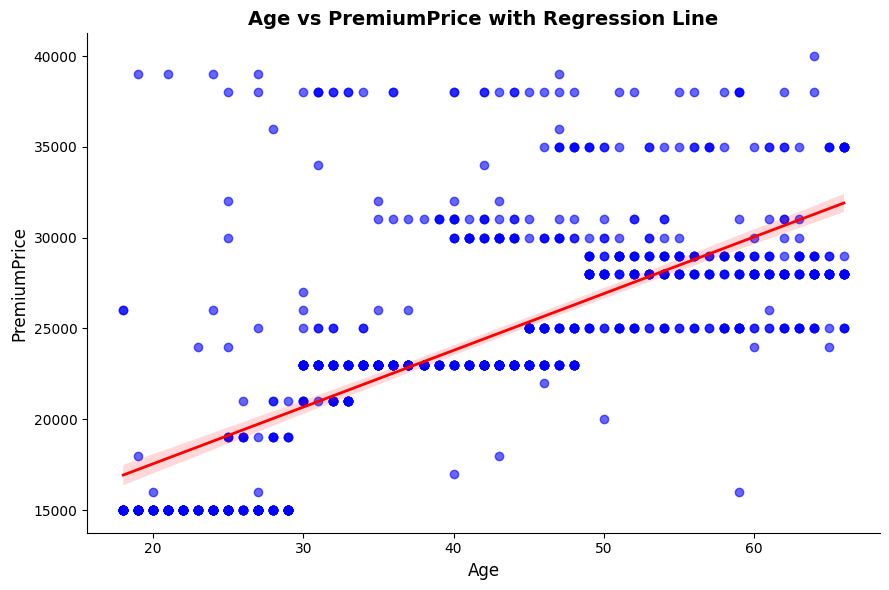

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Age', y='PremiumPrice', marker='o', linestyle='-', color='blue', label='Lineplot')
plt.title('Age vs PremiumPrice', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('PremiumPrice', fontsize=12)

# Calculate and display correlation coefficient
corr, p_val = pearsonr(df['Age'], df['PremiumPrice'])
plt.text(0.05, 0.95, f'Correlation: r = {corr:.2f}, p = {p_val:.4f}', 
         transform=plt.gca().transAxes, fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Linear regression plot 
sns.lmplot(x='Age', y='PremiumPrice', data=df, height=6, aspect=1.5, 
           scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2})
plt.title('Age vs PremiumPrice with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('PremiumPrice', fontsize=12)
plt.tight_layout()
plt.show()

`We see that the premium rises in tandem with age.

The LM plot confirms that there is a positive correlation between premium price and age.

Additionally, we notice a few anomalies that could be caused by a variety of circumstances.

It is thought that as people age, their likelihood of developing health issues likewise increases, which is why the premium amount rises in tandem.

### Relation between Weight and Premium Price.


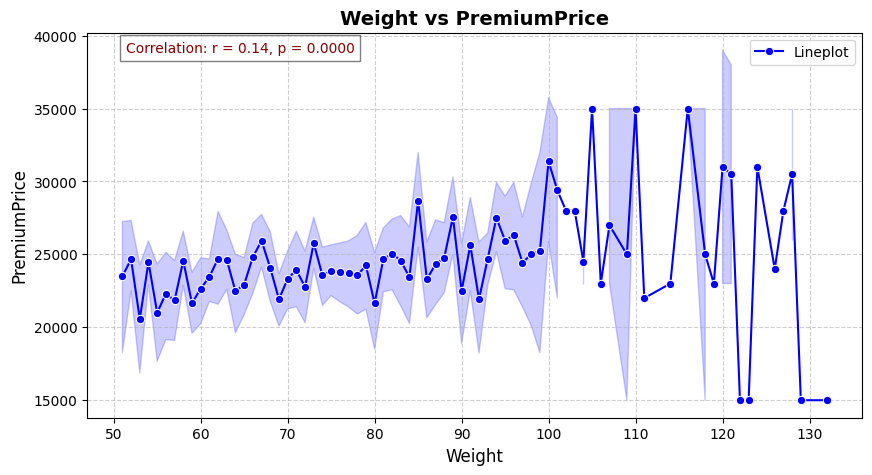

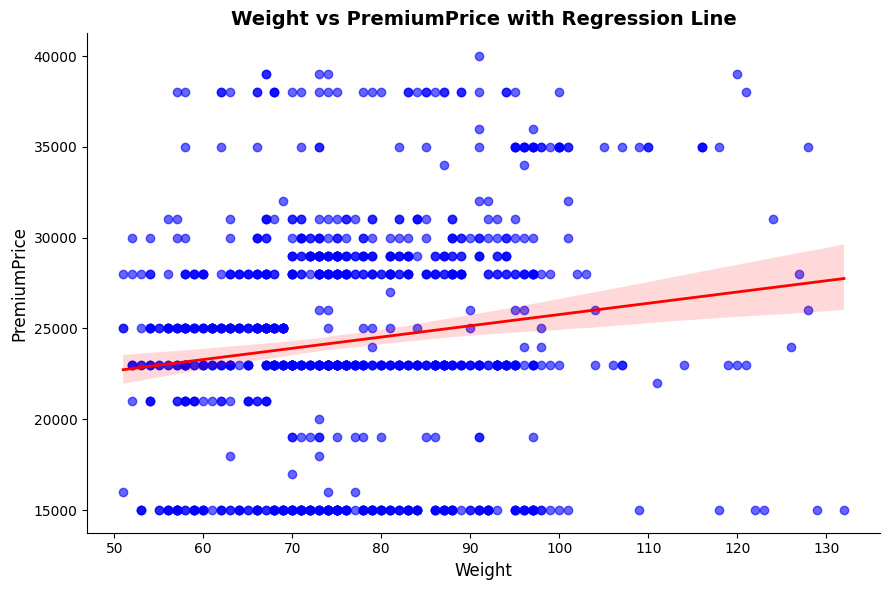

In [21]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Weight', y='PremiumPrice', marker='o', linestyle='-', color='blue', label='Lineplot')
plt.title('Weight vs PremiumPrice', fontsize=14, fontweight='bold')
plt.xlabel('Weight', fontsize=12)
plt.ylabel('PremiumPrice', fontsize=12)

# Calculate and display correlation coefficient
corr, p_val = pearsonr(df['Weight'], df['PremiumPrice'])
plt.text(0.05, 0.95, f'Correlation: r = {corr:.2f}, p = {p_val:.4f}', 
         transform=plt.gca().transAxes, fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Linear regression plot 
sns.lmplot(x='Weight', y='PremiumPrice', data=df, height=6, aspect=1.5, 
           scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2})
plt.title('Weight vs PremiumPrice with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Weight', fontsize=12)
plt.ylabel('PremiumPrice', fontsize=12)
plt.tight_layout()
plt.show()

Being overweight or obese usually results in higher life insurance rates since insurers consider your height and weight when determining rates. The price actually varies with weight, as we have seen that certain users who weigh a lot pay a big premium, while other users who weigh more pay a lower premium. 
Overall, we can conclude from the regression plot that PremiumPrice and Weight have a positive relationship. We might see a more distinct picture if we have more data.
or there may be more causes affecting the abnormality.

Since insurers consider your height and weight for BMI calculations while determining premiums, being overweight or obese usually results in higher premium prices, according to industry trends.

### Relation between Height and Premium Price.

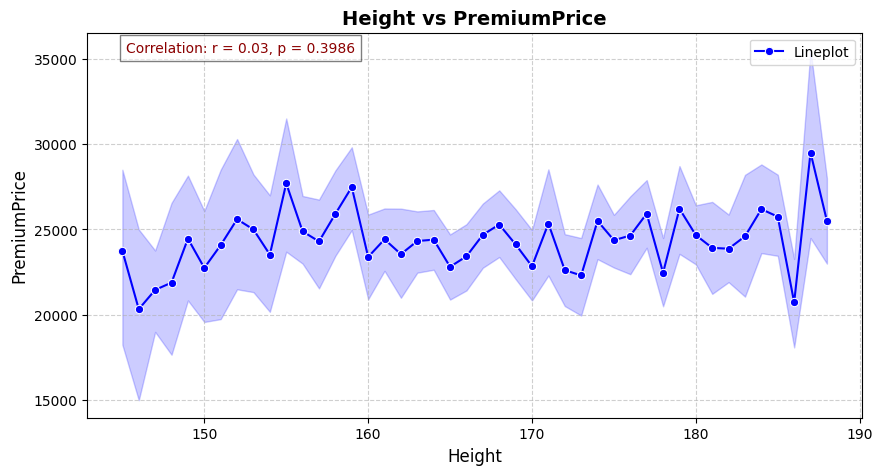

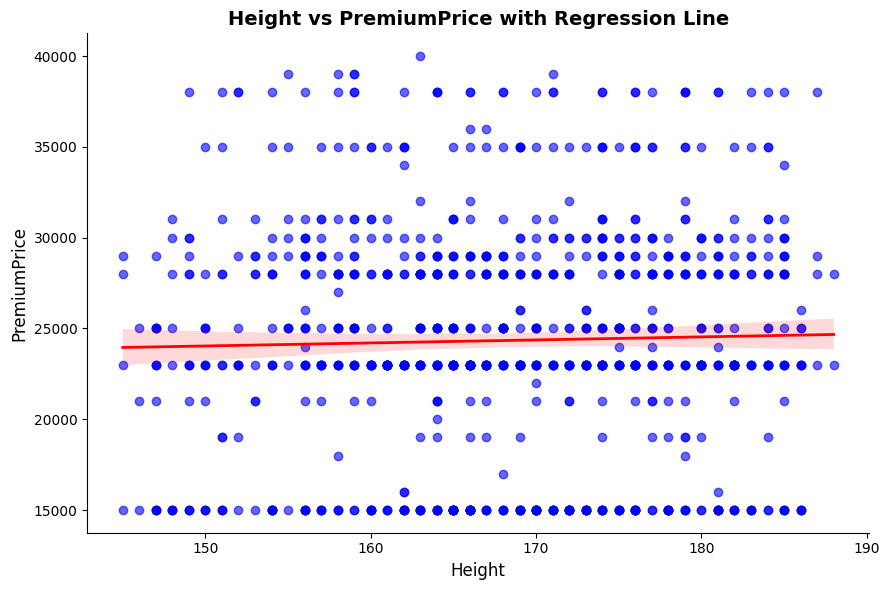

In [22]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Height', y='PremiumPrice', marker='o', linestyle='-', color='blue', label='Lineplot')
plt.title('Height vs PremiumPrice', fontsize=14, fontweight='bold')
plt.xlabel('Height', fontsize=12)
plt.ylabel('PremiumPrice', fontsize=12)

# Calculate and display correlation coefficient
corr, p_val = pearsonr(df['Height'], df['PremiumPrice'])
plt.text(0.05, 0.95, f'Correlation: r = {corr:.2f}, p = {p_val:.4f}', 
         transform=plt.gca().transAxes, fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Linear regression plot 
sns.lmplot(x='Height', y='PremiumPrice', data=df, height=6, aspect=1.5, 
           scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2})
plt.title('Height vs PremiumPrice with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Height', fontsize=12)
plt.ylabel('PremiumPrice', fontsize=12)
plt.tight_layout()
plt.show()


While we find that there is little to no correlation between height and premium, this could be because height is a consideration in calculating BMI, and premiums are set based on BMI.

### Relation between Number Of Major Surgeries and Premium Price

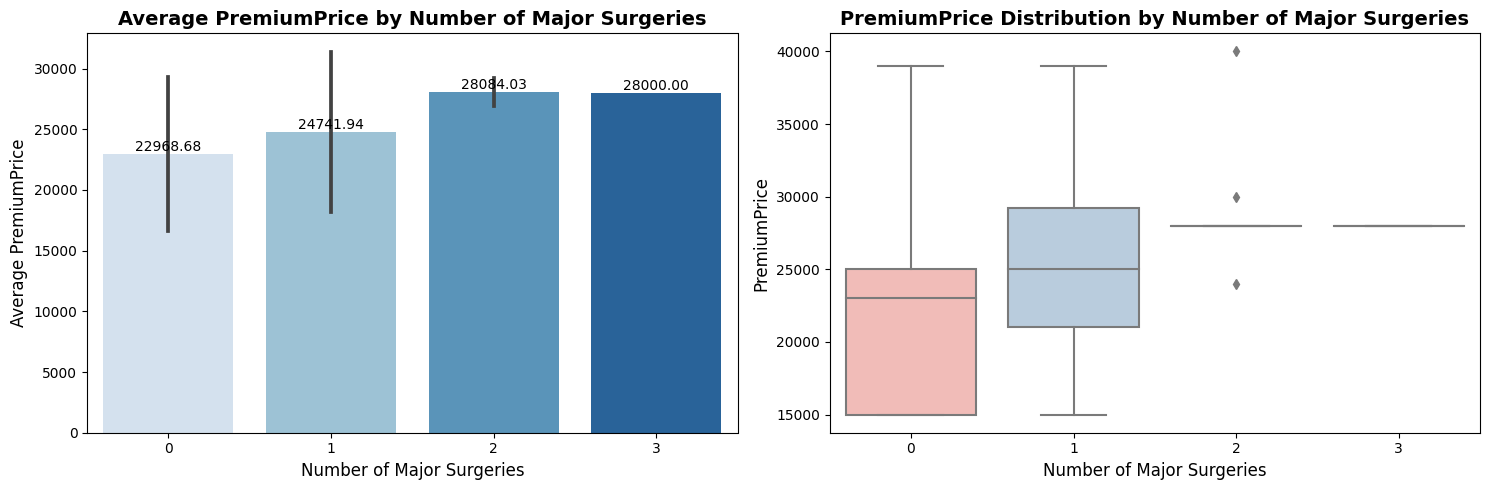

In [23]:

f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df, x='NumberOfMajorSurgeries', y='PremiumPrice', ax=ax[0], ci='sd', palette='Blues')
ax[0].set_title('Average PremiumPrice by Number of Major Surgeries', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Major Surgeries', fontsize=12)
ax[0].set_ylabel('Average PremiumPrice', fontsize=12)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.boxplot(data=df, x='NumberOfMajorSurgeries', y='PremiumPrice', ax=ax[1], palette='Pastel1')
ax[1].set_title('PremiumPrice Distribution by Number of Major Surgeries', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Major Surgeries', fontsize=12)
ax[1].set_ylabel('PremiumPrice', fontsize=12)

for i, box in enumerate(ax[1].artists):
    median = df[df['NumberOfMajorSurgeries'] == df['NumberOfMajorSurgeries'].unique()[i]]['PremiumPrice'].median()
    ax[1].text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.show()


We observe that with increasing number of surgeries, premium price increases, although not significantly but it is clearly a positive correlation

### Relation between History Of Cancer In Family and Premium Price.

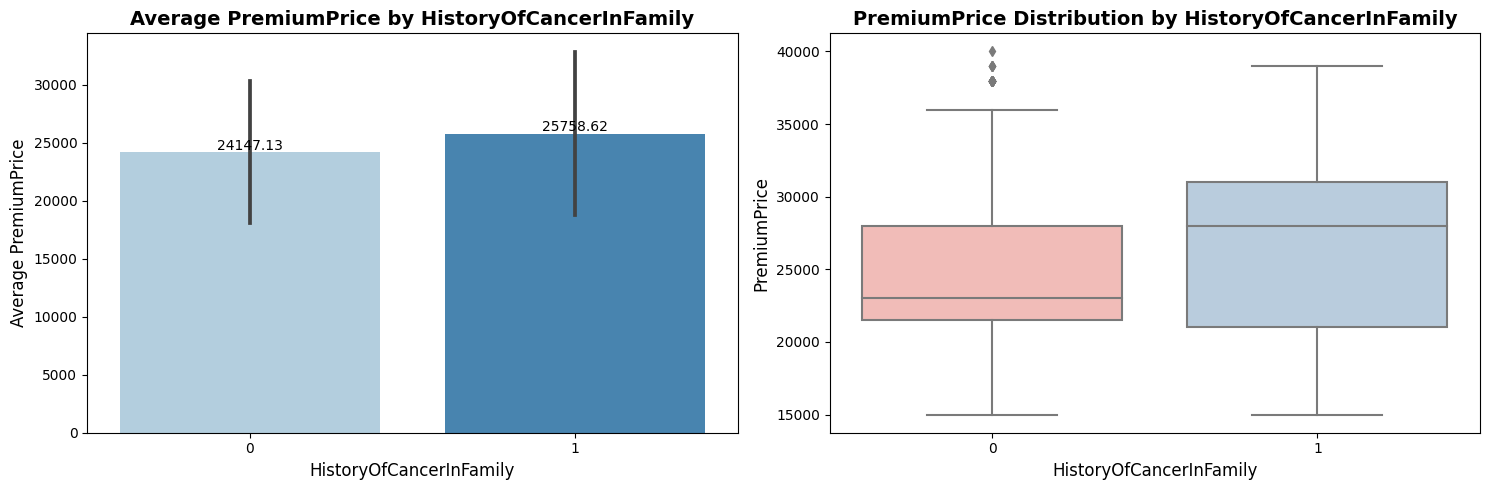

In [24]:

f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df, x='HistoryOfCancerInFamily', y='PremiumPrice', ax=ax[0], ci='sd', palette='Blues')
ax[0].set_title('Average PremiumPrice by HistoryOfCancerInFamily', fontsize=14, fontweight='bold')
ax[0].set_xlabel('HistoryOfCancerInFamily', fontsize=12)
ax[0].set_ylabel('Average PremiumPrice', fontsize=12)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.boxplot(data=df, x='HistoryOfCancerInFamily', y='PremiumPrice', ax=ax[1], palette='Pastel1')
ax[1].set_title('PremiumPrice Distribution by HistoryOfCancerInFamily', fontsize=14, fontweight='bold')
ax[1].set_xlabel('HistoryOfCancerInFamily', fontsize=12)
ax[1].set_ylabel('PremiumPrice', fontsize=12)

for i, box in enumerate(ax[1].artists):
    median = df[df['HistoryOfCancerInFamily'] == df['HistoryOfCancerInFamily'].unique()[i]]['PremiumPrice'].median()
    ax[1].text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.show()


There is increase in PremiumPrice if there is a history of cancer in family

### Relation between Known Allergies In Family and Premium Price.

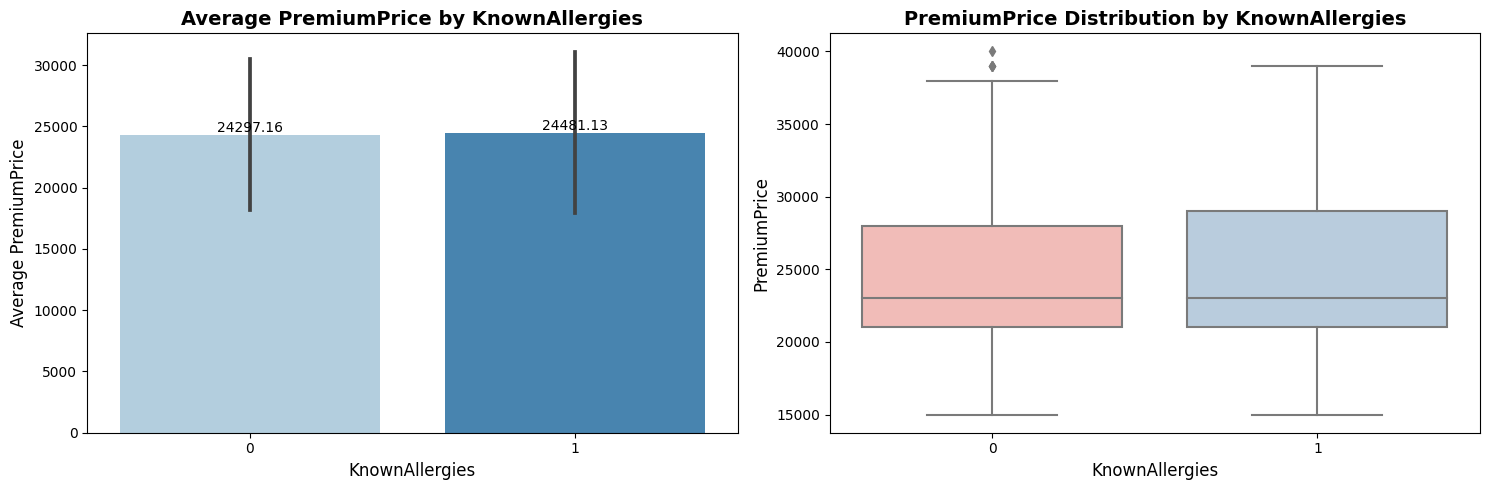

In [25]:

f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df, x='KnownAllergies', y='PremiumPrice', ax=ax[0], ci='sd', palette='Blues')
ax[0].set_title('Average PremiumPrice by KnownAllergies', fontsize=14, fontweight='bold')
ax[0].set_xlabel('KnownAllergies', fontsize=12)
ax[0].set_ylabel('Average PremiumPrice', fontsize=12)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.boxplot(data=df, x='KnownAllergies', y='PremiumPrice', ax=ax[1], palette='Pastel1')
ax[1].set_title('PremiumPrice Distribution by KnownAllergies', fontsize=14, fontweight='bold')
ax[1].set_xlabel('KnownAllergies', fontsize=12)
ax[1].set_ylabel('PremiumPrice', fontsize=12)

for i, box in enumerate(ax[1].artists):
    median = df[df['KnownAllergies'] == df['KnownAllergies'].unique()[i]]['PremiumPrice'].median()
    ax[1].text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.show()


We observe that there is not Much difference in the Premium Price with respect to Users with Known Allergies or NO Allergies.

### Relation between Any Chronic Diseases In Family and Premium Price.


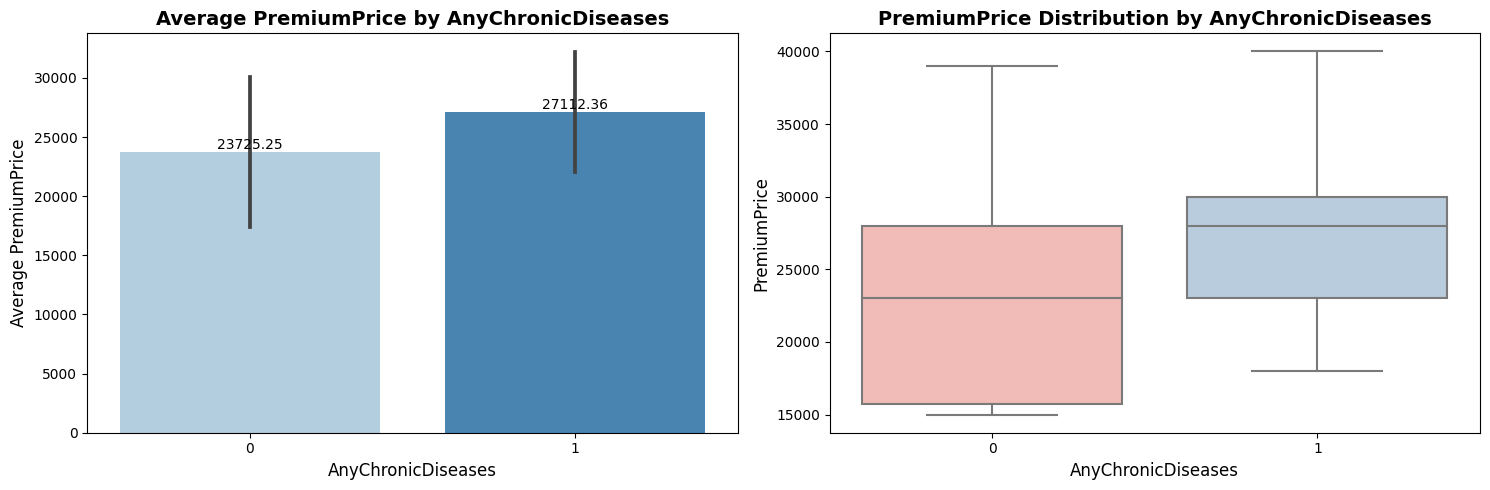

In [26]:

f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df, x='AnyChronicDiseases', y='PremiumPrice', ax=ax[0], ci='sd', palette='Blues')
ax[0].set_title('Average PremiumPrice by AnyChronicDiseases', fontsize=14, fontweight='bold')
ax[0].set_xlabel('AnyChronicDiseases', fontsize=12)
ax[0].set_ylabel('Average PremiumPrice', fontsize=12)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.boxplot(data=df, x='AnyChronicDiseases', y='PremiumPrice', ax=ax[1], palette='Pastel1')
ax[1].set_title('PremiumPrice Distribution by AnyChronicDiseases', fontsize=14, fontweight='bold')
ax[1].set_xlabel('AnyChronicDiseases', fontsize=12)
ax[1].set_ylabel('PremiumPrice', fontsize=12)

for i, box in enumerate(ax[1].artists):
    median = df[df['AnyChronicDiseases'] == df['AnyChronicDiseases'].unique()[i]]['PremiumPrice'].median()
    ax[1].text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.show()


We observe that Users with Any Chronic Diseases pay higher Premium Price.

### Relation between Any Transplants In Family and Premium Price.


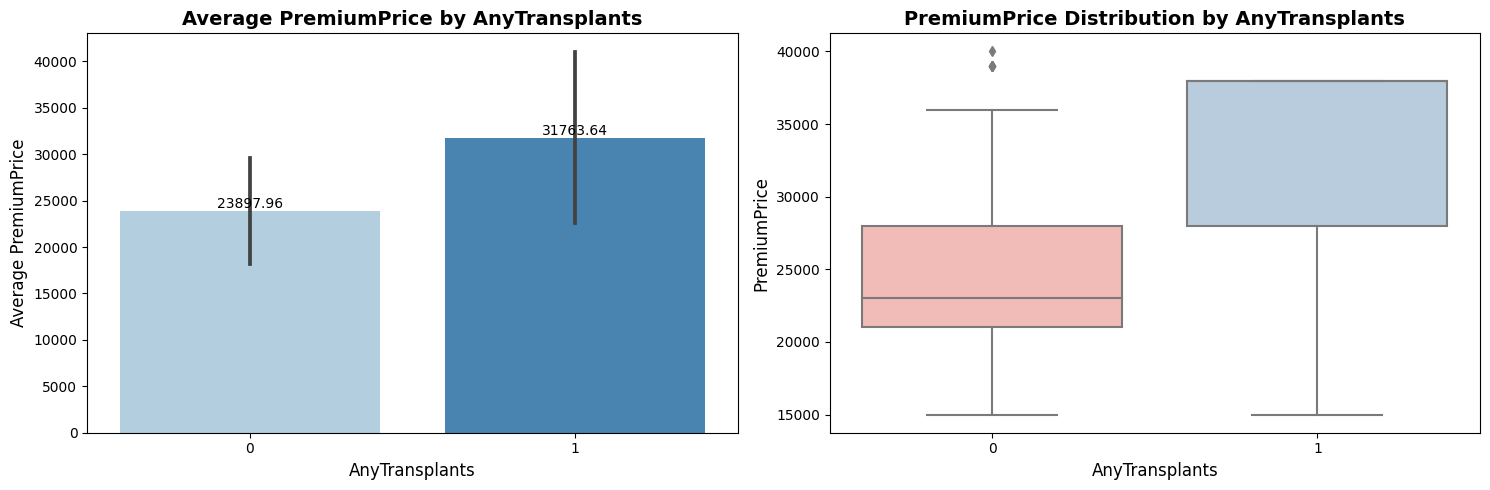

In [27]:

f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df, x='AnyTransplants', y='PremiumPrice', ax=ax[0], ci='sd', palette='Blues')
ax[0].set_title('Average PremiumPrice by AnyTransplants', fontsize=14, fontweight='bold')
ax[0].set_xlabel('AnyTransplants', fontsize=12)
ax[0].set_ylabel('Average PremiumPrice', fontsize=12)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.boxplot(data=df, x='AnyTransplants', y='PremiumPrice', ax=ax[1], palette='Pastel1')
ax[1].set_title('PremiumPrice Distribution by AnyTransplants', fontsize=14, fontweight='bold')
ax[1].set_xlabel('AnyTransplants', fontsize=12)
ax[1].set_ylabel('PremiumPrice', fontsize=12)

for i, box in enumerate(ax[1].artists):
    median = df[df['AnyTransplants'] == df['AnyTransplants'].unique()[i]]['PremiumPrice'].median()
    ax[1].text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.show()


We observe that Users with Any Transplants pay higher Premium Price.

### Relation between Blood Pressure Problems In Family and Premium Price.

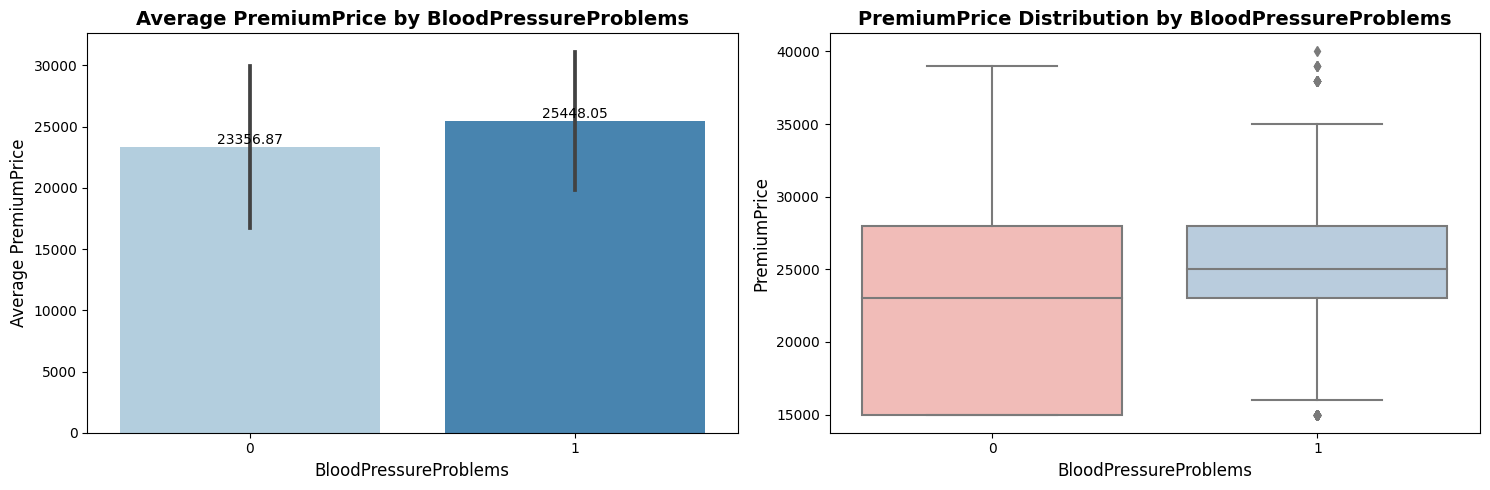

In [28]:

f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=df, x='BloodPressureProblems', y='PremiumPrice', ax=ax[0], ci='sd', palette='Blues')
ax[0].set_title('Average PremiumPrice by BloodPressureProblems', fontsize=14, fontweight='bold')
ax[0].set_xlabel('BloodPressureProblems', fontsize=12)
ax[0].set_ylabel('Average PremiumPrice', fontsize=12)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

sns.boxplot(data=df, x='BloodPressureProblems', y='PremiumPrice', ax=ax[1], palette='Pastel1')
ax[1].set_title('PremiumPrice Distribution by BloodPressureProblems', fontsize=14, fontweight='bold')
ax[1].set_xlabel('BloodPressureProblems', fontsize=12)
ax[1].set_ylabel('PremiumPrice', fontsize=12)

for i, box in enumerate(ax[1].artists):
    median = df[df['BloodPressureProblems'] == df['BloodPressureProblems'].unique()[i]]['PremiumPrice'].median()
    ax[1].text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='darkred', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout
plt.tight_layout()
plt.show()


We find that the median premium price for people with high blood pressure is higher than that of people without such issues. However, some users pay a significantly higher premium even though they do not have blood pressure issues.

## Hypothesis Testing

### Hypothesis-1 :
#### Null Hypothesis (H₀): The mean PremiumPrice is the same for individuals with and without a history of cancer in the family.
#### Alternative Hypothesis (H₁): The mean PremiumPrice differs between the two groups.

In [29]:
# Filter data by HistoryOfCancerInFamily
group_yes = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
group_no = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']

# Perform t-test
t_stat, p_val = ttest_ind(group_yes, group_no, equal_var=False)

# Display results
print("Two-Sample T-Test Results:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in PremiumPrice.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in PremiumPrice.")


Two-Sample T-Test Results:
T-statistic: 2.36
P-value: 0.0198
Reject Null Hypothesis: There is a significant difference in PremiumPrice.


### Hypothesis-2:
#### Null Hypothesis (H₀): The mean PremiumPrice is the same across all groups of NumberOfMajorSurgeries.
#### Alternative Hypothesis (H₁): At least one group has a different mean PremiumPrice.

In [30]:
# Group data by NumberOfMajorSurgeries
groups = [df[df['NumberOfMajorSurgeries'] == x]['PremiumPrice'] for x in df['NumberOfMajorSurgeries'].unique()]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)

# Display results
print("ANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject Null Hypothesis: Significant differences exist among groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant differences among groups.")


ANOVA Results:
F-statistic: 26.14
P-value: 0.0000
Reject Null Hypothesis: Significant differences exist among groups.


### Hypothesis-3:
#### Null Hypothesis (H₀): HistoryOfCancerInFamily and Diabetes are independent.
#### Alternative Hypothesis (H₁): HistoryOfCancerInFamily and Diabetes are not independent.

In [31]:
# Create a contingency table
contingency_table = pd.crosstab(df['HistoryOfCancerInFamily'], df['Diabetes'])

# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2-statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p_val < 0.05:
    print("Reject Null Hypothesis: HistoryOfCancerInFamily and Diabetes are not independent.")
else:
    print("Fail to Reject Null Hypothesis: No evidence to suggest dependence.")


Chi-Square Test Results:
Chi2-statistic: 2.70
P-value: 0.1003
Degrees of Freedom: 1
Expected Frequencies:
[[504.70588235 365.29411765]
 [ 67.29411765  48.70588235]]
Fail to Reject Null Hypothesis: No evidence to suggest dependence.


### Hypothesis-4:
#### Null Hypothesis (H₀): There is no correlation between Age and PremiumPrice.
#### Alternative Hypothesis (H₁): There is a significant correlation between Age and PremiumPrice.

In [32]:
# Perform Pearson correlation test
corr, p_val = pearsonr(df['Age'], df['PremiumPrice'])

# Display results
print("Pearson Correlation Test Results:")
print(f"Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject Null Hypothesis: Significant correlation exists.")
else:
    print("Fail to Reject Null Hypothesis: No significant correlation.")


Pearson Correlation Test Results:
Correlation Coefficient: 0.70
P-value: 0.0000
Reject Null Hypothesis: Significant correlation exists.


## Conclusion of EDA:


#### From the observations above, the factors that significantly influence the user's premium are:

    - Age
    - Any Transplants
    - Any Chronic Diseases
    - Weight
    - Family History of Cancer
    - Number of Major Surgeries
    - Height
    
#### Additionally, we note that the following factors have little to no effect on the premium price:

    - Known Allergies
    - Blood Pressure Problems
    - Diabetes

## Model Training

### Split features and target


In [33]:
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

### Split the data into training and testing sets


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the features


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Common Function to evaluate models


In [36]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    
    return {'model': model_name, 'r2': r2, 'rmse': rmse, 'mae': mae}


In [37]:
# List to store results
results = []
best_models = {}

### 1. Linear Regression


In [38]:
print("\n=== Linear Regression ===")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
results.append(evaluate_model(y_test, lr_pred, "Linear Regression"))


=== Linear Regression ===

Linear Regression Performance Metrics:
R² Score: 0.7134
RMSE: 3495.95
MAE: 2586.23


### 2. Ridge Regression


In [39]:
print("\n=== Ridge Regression Hyperparameter Tuning ===")
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {ridge_grid.best_params_}")
ridge_pred = ridge_grid.predict(X_test_scaled)
results.append(evaluate_model(y_test, ridge_pred, "Ridge Regression (Tuned)"))
best_models['Ridge'] = ridge_grid.best_estimator_



=== Ridge Regression Hyperparameter Tuning ===
Best parameters: {'alpha': 10.0, 'solver': 'lsqr'}

Ridge Regression (Tuned) Performance Metrics:
R² Score: 0.7117
RMSE: 3506.14
MAE: 2596.71


### 3. Random Forest


In [40]:
# 2. Random Forest with GridSearchCV
print("\n=== Random Forest Hyperparameter Tuning ===")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {rf_grid.best_params_}")
rf_pred = rf_grid.predict(X_test_scaled)
results.append(evaluate_model(y_test, rf_pred, "Random Forest (Tuned)"))
best_models['Random Forest'] = rf_grid.best_estimator_


=== Random Forest Hyperparameter Tuning ===
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest (Tuned) Performance Metrics:
R² Score: 0.9016
RMSE: 2047.96
MAE: 978.90


### 4. Gradient Boosting


In [41]:
# 3. Gradient Boosting with GridSearchCV
print("\n=== Gradient Boosting Hyperparameter Tuning ===")
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {gb_grid.best_params_}")
gb_pred = gb_grid.predict(X_test_scaled)
results.append(evaluate_model(y_test, gb_pred, "Gradient Boosting (Tuned)"))
best_models['Gradient Boosting'] = gb_grid.best_estimator_


=== Gradient Boosting Hyperparameter Tuning ===
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}

Gradient Boosting (Tuned) Performance Metrics:
R² Score: 0.8739
RMSE: 2318.99
MAE: 1452.02


### 5. XGBoost


In [42]:
# 4. XGBoost with GridSearchCV
print("\n=== XGBoost Hyperparameter Tuning ===")
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_grid = GridSearchCV(xgb.XGBRegressor(random_state=42), xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {xgb_grid.best_params_}")
xgb_pred = xgb_grid.predict(X_test_scaled)
results.append(evaluate_model(y_test, xgb_pred, "XGBoost (Tuned)"))
best_models['XGBoost'] = xgb_grid.best_estimator_



=== XGBoost Hyperparameter Tuning ===
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

XGBoost (Tuned) Performance Metrics:
R² Score: 0.8555
RMSE: 2482.56
MAE: 1326.84


### 6. SVR


In [43]:
# 5. SVR with GridSearchCV
print("\n=== SVR Hyperparameter Tuning ===")
svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}
svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {svr_grid.best_params_}")
svr_pred = svr_grid.predict(X_test_scaled)
results.append(evaluate_model(y_test, svr_pred, "SVR (Tuned)"))
best_models['SVR'] = svr_grid.best_estimator_


=== SVR Hyperparameter Tuning ===
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

SVR (Tuned) Performance Metrics:
R² Score: 0.4957
RMSE: 4637.22
MAE: 3494.91


### Create a comparison plot


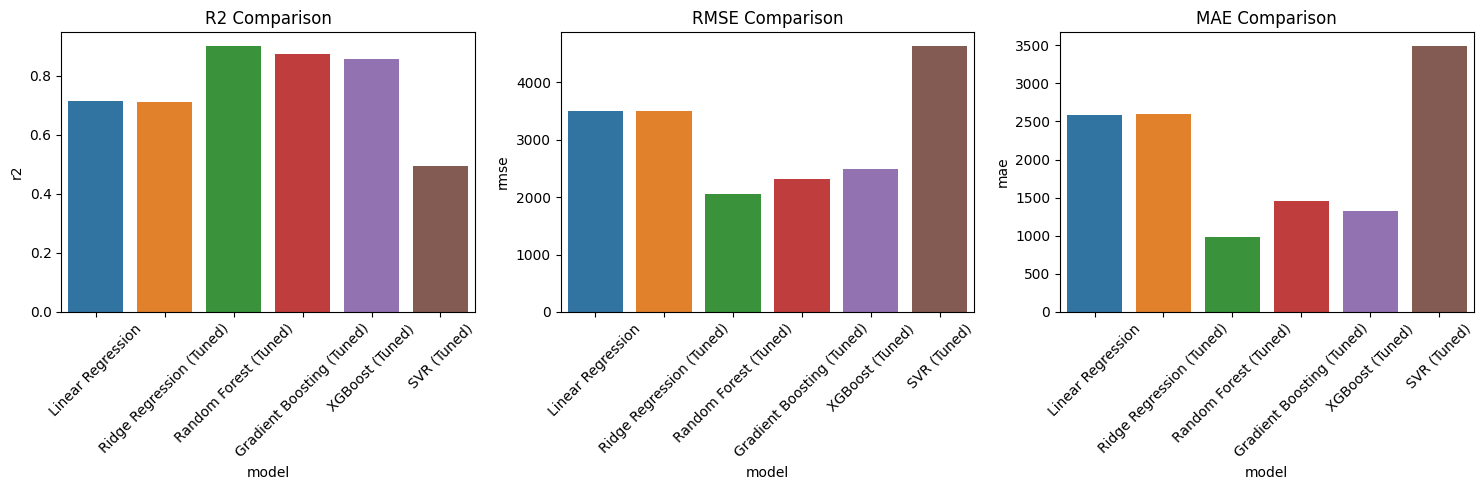

In [44]:

# Create comparison plots
results_df = pd.DataFrame(results)
metrics = ['r2', 'rmse', 'mae']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='model', y=metric, data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'{metric.upper()} Comparison')
plt.tight_layout()
plt.show()

### Feature Importance Analysis (for Random Forest)


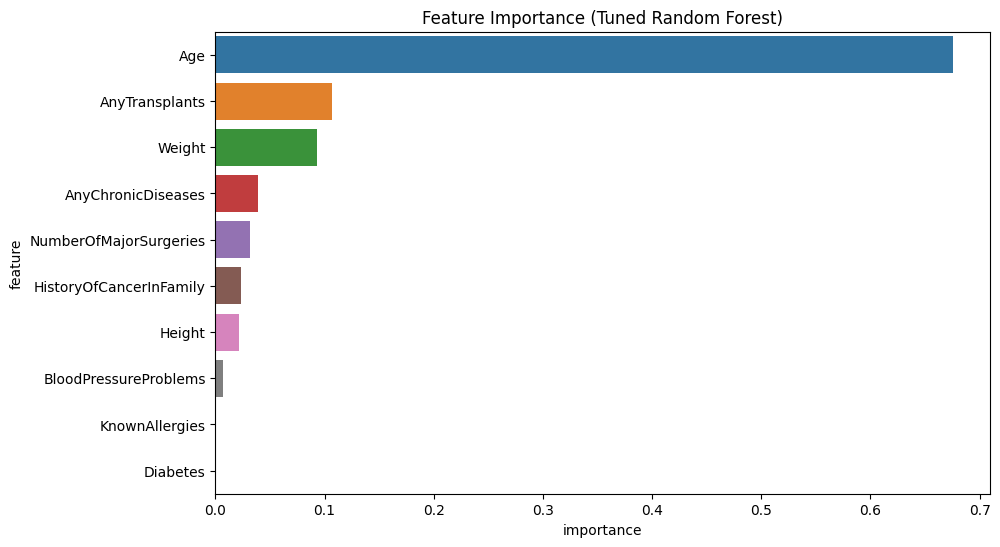

In [45]:
# Feature Importance Analysis (for best Random Forest model)
rf_best = best_models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Tuned Random Forest)')
plt.show()



In [46]:
# Find the best overall model
best_model_idx = results_df['r2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'model']
print(f"\nBest performing model: {best_model_name}")
print("Best parameters for each model:")
for model_name, model in best_models.items():
    if hasattr(model, 'get_params'):
        print(f"\n{model_name}:")
        if model_name == "Ridge":
            print(f"Alpha: {model.alpha}")
            print(f"Solver: {model.solver}")
        else:
            important_params = {k: v for k, v in model.get_params().items() 
                              if not k.startswith('_') and not callable(v)}
            for param, value in important_params.items():
                print(f"{param}: {value}")


Best performing model: Random Forest (Tuned)
Best parameters for each model:

Ridge:
Alpha: 10.0
Solver: lsqr

Random Forest:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: 20
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 10
min_weight_fraction_leaf: 0.0
n_estimators: 300
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False

Gradient Boosting:
alpha: 0.9
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.01
loss: squared_error
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 300
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False

XGBoost:
objective: reg:squarederror
base_score: 0.5
booster: gbtree
callbacks: None
colsample_bylevel: 1
colsample_bynode: 1
colsample_bytre

In [47]:
# Save results
results_df.to_csv('model_comparison_results_tuned.csv', index=False)

# Save best model parameters
best_params_dict = {}
for model_name, model in best_models.items():
    if hasattr(model, 'get_params'):
        best_params_dict[model_name] = model.get_params()
    
pd.DataFrame([best_params_dict]).to_csv('best_model_parameters.csv', index=False)

## Model Analysis:
#### We tried different machine learning models but Random Forest is giving us the best results so far, so we will use this model for further analysis

## Saving the Random Forest model to pickle file

In [49]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_grid, file)